In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [5]:
unique_values = df['month'].unique()
unique_values.sort()

In [6]:
groupDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag','month']]

In [7]:
groupDf['Toxicity'] = groupDf['Toxicity'] * 10
groupDf['Toxicity'] = (groupDf['Toxicity'].apply(np.ceil)) / 10

In [8]:
groupDf = groupDf[groupDf['Toxicity'] != 0.0]

In [9]:
def categorize_tweets(group):
    if (group['qt_flag'] == False).all() and (group['rt_flag'] == False).all():
        return 'o'
    elif (group['qt_flag'] == False).all() and (group['rt_flag'] == True).all():
        return 'r'
    elif (group['qt_flag'] == True).all() and (group['rt_flag'] == False).all():
        return 'q'
    elif ((group['qt_flag'] == False) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_r'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == False)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_q'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'q_r'
    else:
        return 'o_q_r'

In [22]:
def pltMonth(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  userDf = userDf.reset_index()
  userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})
  dict_cat = {}
  # cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]
  cat_list = ["o","q","o_q"]
  for i in range(3):
      for j in range(10):
          string_want  = f"{cat_list[i]}_{(j+1)/10}" 
          dict_cat[string_want] = 0
  for index, row in userDf.iterrows():
    cat = userDf['user_category'].iloc[index]
    # cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]]
    cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]][["Toxicity"]].drop_duplicates()
    for j, c_row in cat_user.iterrows():
      t_score = c_row["Toxicity"]
      string_put = f"{cat}_{t_score}"
      dict_cat[string_put] += 1
  x = [i/10 for i in range(1, 11)]
  for cat in cat_list:
      y = [dict_cat[f"{cat}_{tox}"] for tox in x]
      # print(y)
      plt.plot(x, y, label=cat)

  plt.xlabel("Toxicity Score")
  plt.ylabel("Count of Users")
  plt.title(f"Month Number - {monthIn}")
  plt.xticks(x)
  plt.legend()
  plt.show()

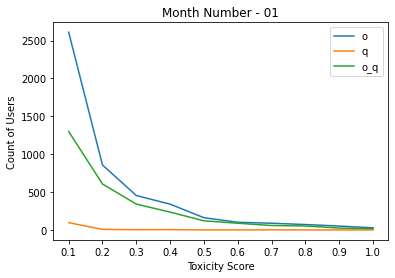

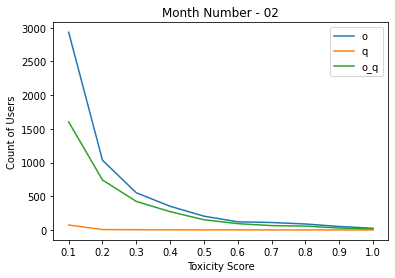

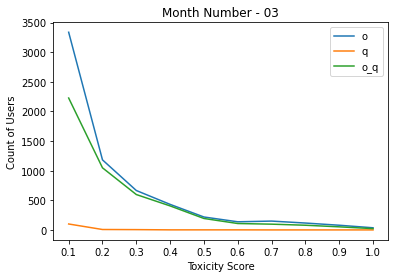

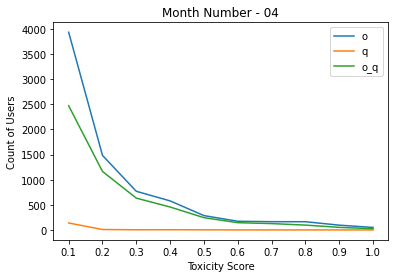

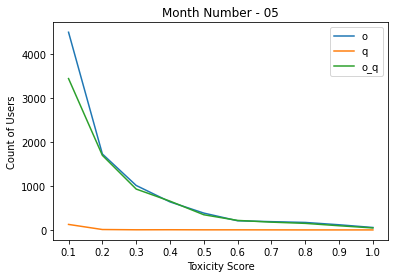

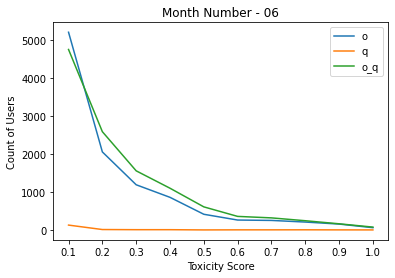

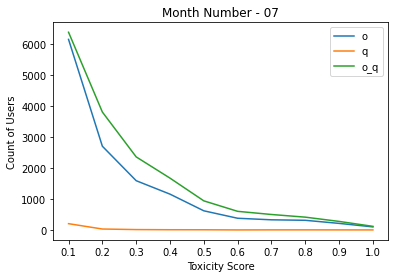

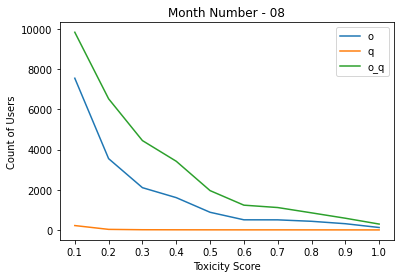

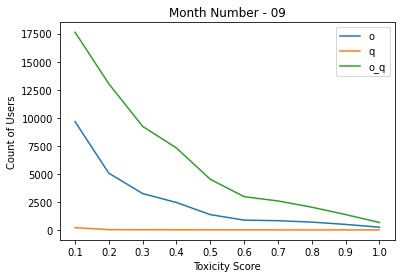

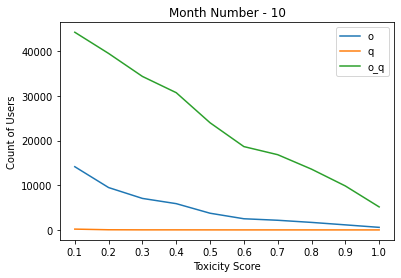

In [23]:
for i in unique_values:
  pltMonth(i)
# plt.figure()
# for i, unique_value in enumerate(unique_values):
#   pltMonth(unique_value, i+1)
# plt.show()

In [12]:
def pltMonthWithLog(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  userDf = userDf.reset_index()
  userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})
  dict_cat = {}
  # cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]
  cat_list = ["o","q","o_q"]
  for i in range(3):
      for j in range(10):
          string_want  = f"{cat_list[i]}_{(j+1)/10}" 
          dict_cat[string_want] = 0
  for index, row in userDf.iterrows():
    cat = userDf['user_category'].iloc[index]
    # cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]]
    cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]][["Toxicity"]].drop_duplicates()
    for j, c_row in cat_user.iterrows():
      t_score = c_row["Toxicity"]
      string_put = f"{cat}_{t_score}"
      dict_cat[string_put] += 1
  x = [i/10 for i in range(1, 11)]
  for cat in cat_list:
      y = [dict_cat[f"{cat}_{tox}"] for tox in x]
      # print(y)
      plt.semilogy(x, y, label=cat)

  plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

  plt.xlabel("Toxicity Score")
  plt.ylabel("Count of Users")
  plt.title(f"Month Number - {monthIn}")
  plt.xticks(x)
  plt.legend()
  plt.show()
  

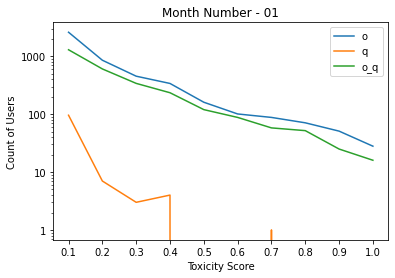

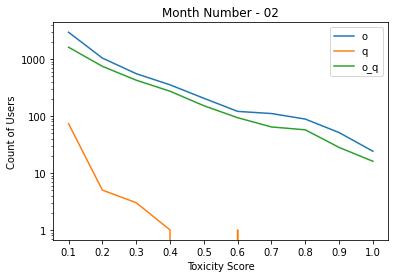

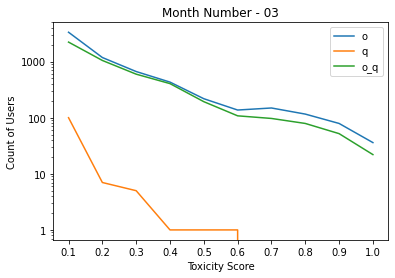

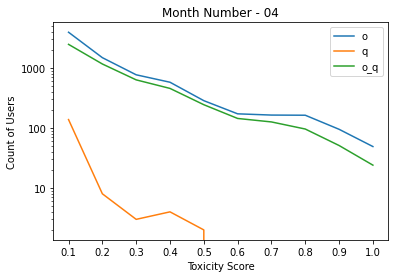

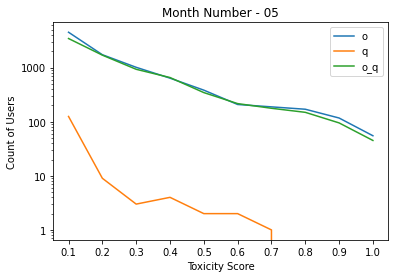

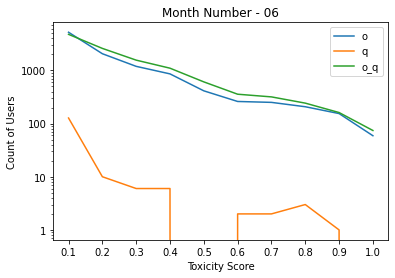

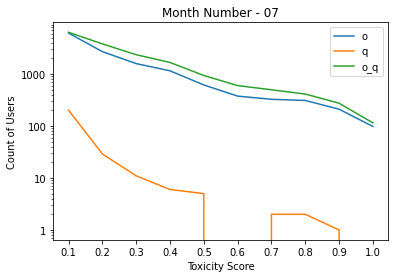

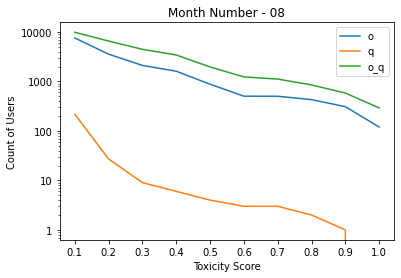

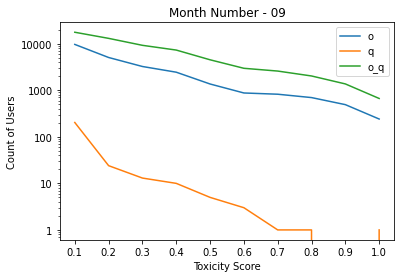

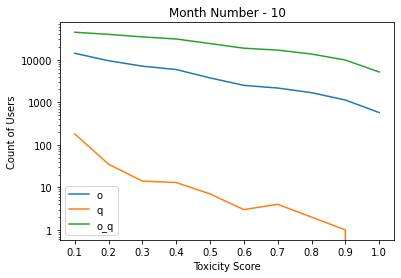

In [13]:
for i in unique_values:
  pltMonthWithLog(i)

In [14]:
'''
I have a data frame in python pandas with the following columns.
monthDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag']]

The user_id contains the id's of all the users
The Toxicity contains float values between 0-1
The qt_flag says whether the tweet is a quoted tweet or not. The values of the column are True and False. 
The rt_flag says whether the tweet is a retweet or not. The values of the column are True and False. 

I am categorizing the tweets in 3 categories. 
1) original
2) retweet
3) quoted tweet

A tweet is original if qt_flag = False and rt_flag = False
A tweet is retweet if qt_flag = False and rt_flag = True
A tweet is quoted tweet if qt_flag = True and rt_flag = False

A user has multiple tweets in my dataset, each user will have done different types of tweets. I want to count how many users have for each month. I am listing the categories below:
1) original tweets - i.e all the tweets done by the user will only be original
2) retweets - i.e all the tweets done by the user will only be quoted.
3) quoted - i.e all the tweets done by the user will only be quoted. 
4) original and retweet - i.e all the tweets done by the user will only be of the type original and retweet
5) original and quoted - i.e all the tweets done by the user will only be of the type original and quoted.
6) quoted and retweet - i.e all the tweets done by the user will only be of the type quoted and retweet
7) original, quoted and retweet - i.e. i.e all the tweets done by the user will only be of the type original and retweet

This is how I want the categorization to be. For example, if 
- user 1 has 10 tweets and out of which, 2 tweets are quoted and 8 tweets are original, then the user would go into the category of 'original and quoted'
- if user 2 has 7 tweets out of which 3 are retweet and 4 are quoted, then the user would go into the category of 'quoted and retweet'
- if user 3 has 20 tweets out of which 10 tweets are original, 5 are retweet and 5 are quoted, then the user would go into the category of 'original, quoted and retweet'
- if user 4 has 15 tweets out of which 10 retweets and 5 quoted tweets, then the user would go into the category of 'quoted and retweet'

how do I categories all the tweets into the 7 different categories?   

After doing the categorization, I want to make a plot, where on 
x axis I want the toxicity (0.1,0.2,0.3 etc)
and on the y axis I want the number of users from each category, so there will be 7 different lines with 7 different colors for each category

I will tell you in detail how the plot should look like, lets say for the 
first category (original tweets), there are 5 unique users who have a toxicity score 0.1, then the (x,y) would be (0.1,5) and there are 10 unique users who have a toxicity score 0.4, then the plot would plot that. 
lets say the seventh category (original, quoted and retweet) has 7 unique users who have a toxicity score 0.3, then the plot would plot that. 

now I want to make such a plot for all the 7 categories of users, where on the y axis it is number of unique users and on the x axis it is the toxicity score
'''

"\nI have a data frame in python pandas with the following columns.\nmonthDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag']]\n\nThe user_id contains the id's of all the users\nThe Toxicity contains float values between 0-1\nThe qt_flag says whether the tweet is a quoted tweet or not. The values of the column are True and False. \nThe rt_flag says whether the tweet is a retweet or not. The values of the column are True and False. \n\nI am categorizing the tweets in 3 categories. \n1) original\n2) retweet\n3) quoted tweet\n\nA tweet is original if qt_flag = False and rt_flag = False\nA tweet is retweet if qt_flag = False and rt_flag = True\nA tweet is quoted tweet if qt_flag = True and rt_flag = False\n\nA user has multiple tweets in my dataset, each user will have done different types of tweets. I want to count how many users have for each month. I am listing the categories below:\n1) original tweets - i.e all the tweets done by the user will only be original\n2) retweets - i.e all t

In [ ]:
'''
groupDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag','month']]

def categorize_tweets(group):
    if (group['qt_flag'] == False).all() and (group['rt_flag'] == False).all():
        return 'o'
    elif (group['qt_flag'] == False).all() and (group['rt_flag'] == True).all():
        return 'r'
    elif (group['qt_flag'] == True).all() and (group['rt_flag'] == False).all():
        return 'q'
    elif ((group['qt_flag'] == False) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_r'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == False)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_q'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'q_r'
    else:
        return 'o_q_r'

def pltMonth(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  userDf = userDf.reset_index()
  userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})
  dict_cat = {}
  # cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]
  cat_list = ["o","q","o_q"]
  for i in range(3):
      for j in range(10):
          string_want  = f"{cat_list[i]}_{(j+1)/10}" 
          dict_cat[string_want] = 0
  for index, row in userDf.iterrows():
    cat = userDf['user_category'].iloc[index]
    # cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]]
    cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]][["Toxicity"]].drop_duplicates()
    for j, c_row in cat_user.iterrows():
      t_score = c_row["Toxicity"]
      string_put = f"{cat}_{t_score}"
      dict_cat[string_put] += 1
  x = [i/10 for i in range(1, 11)]
  for cat in cat_list:
      y = [dict_cat[f"{cat}_{tox}"] for tox in x]
      # print(y)
      plt.plot(x, y, label=cat)

  plt.xlabel("Toxicity Score")
  plt.ylabel("Count of Users")
  plt.title(f"Month Number - {monthIn}")
  plt.legend()
  plt.show()

for i in unique_values:
  pltMonth(i)
'''